In [1]:
from scipy.stats import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
np.random.seed(seed=233423)

In [3]:
n = 10000

In [4]:
unif = uniform(loc=0, scale=1)

In [5]:
runif = lambda n : unif.rvs(n)

# Disk area, $\pi$ approximation

Density: $f(x,y) = C \times \mathbb{1}_{x^2 + y^2 \leq 1}$.

Auxilary: $g(x,y) = \mathbb{1}_{[-1,1]}(x) \mathbb{1}_{[-1,1]}(y)$.

We have $f(x,y) \leq m \times g(x,y)$ ou $m = C$
So we set $R(x,y) = \frac{f(x)}{mg(x)} = \mathbb{1}_{x^2 + y^2 \leq 1}$

For get $X \sim f$:

-We get $Y \sim g$ and $U \sim \mathbb{U}[0,1]$, if $U \leq R(Y)$ (ie $R(Y) = 1$) then X = Y, otherwise we start again.

The number of iteration for have one production follows $\mathbb{G}(\frac{1}{m})$
So the average iterations to get one production is m (ie inverse of disk area)

In [6]:
def get_Y(n):
    return (2 * runif(2 * n) - 1).reshape(n,2)
def get_R(Y):
    return (Y ** 2).sum(axis=1) <= 1
def get_X(n):
    X = np.zeros(shape=(n,2))
    Y = get_Y(n)
    l = 0;
    while l != n:
        tmp = (get_R(Y) == 1)
        tmpid = l + tmp.sum()
        X[l:tmpid,:] = Y[tmp]
        l = tmpid
        Y = get_Y(n - l)
    return X

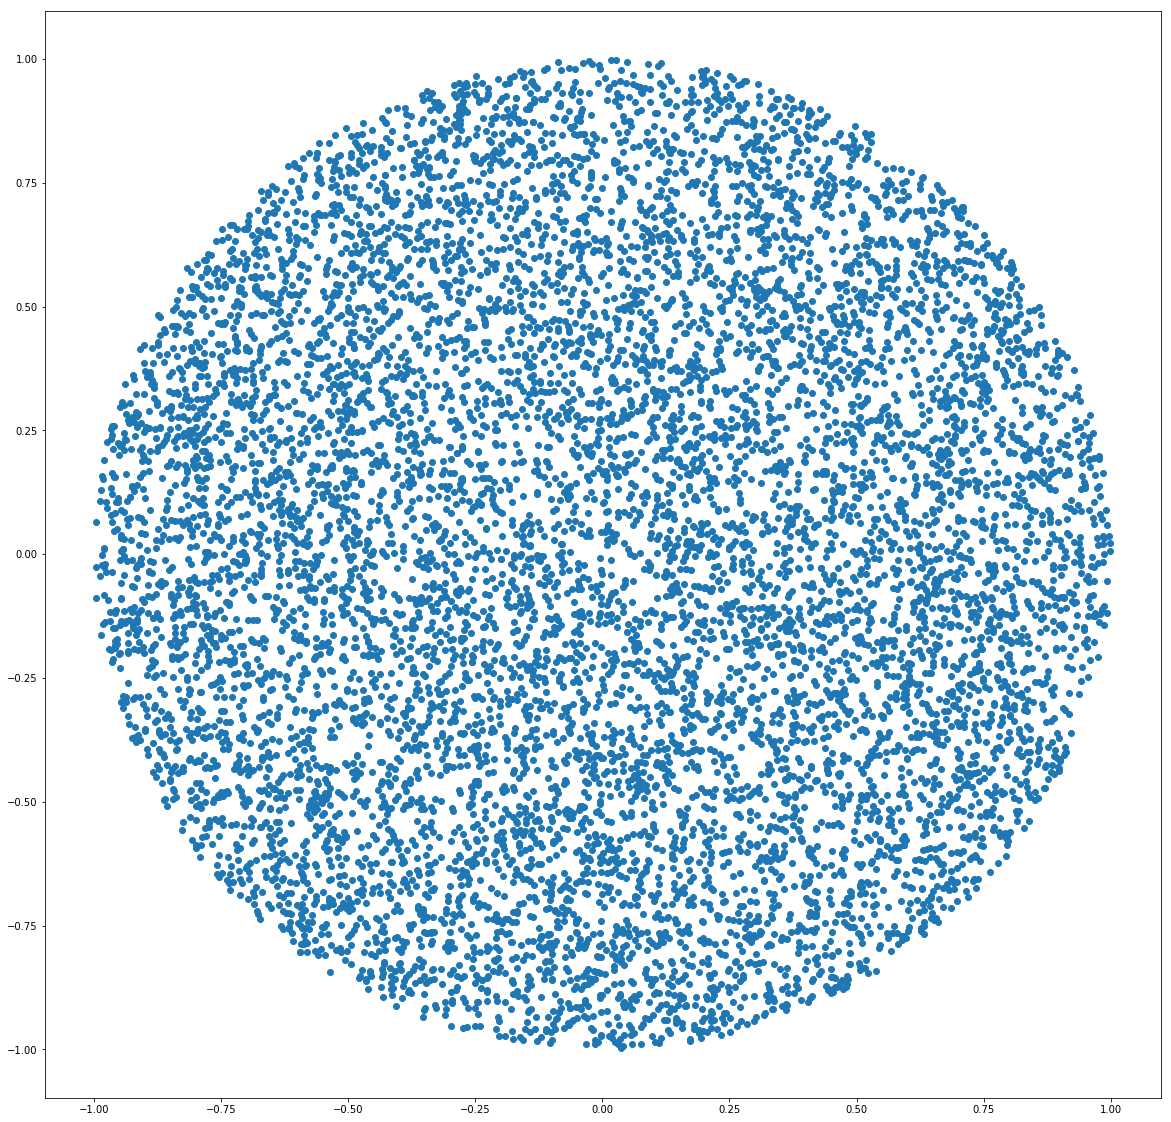

In [7]:
X = get_X(n)
fig, ax = plt.subplots(figsize=(20,20))
ax.plot(X[:,0],X[:,1], 'o')

In [8]:
def get_nb_iter():
    Y = get_Y(1)
    nb = 1
    while get_R(Y) == 0:
        Y = get_Y(1)
        nb = nb + 1
    return (nb)

In [9]:
ite = 0
for i in range(n):
    ite += get_nb_iter()
print(4 * n / ite)
print(np.pi)

3.1414434932851645
3.141592653589793
